In [1]:
#### Importing Libraries ####
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

dataset = pd.read_csv('churn_data.csv') # Users who were 60 days enrolled, churn in the next 30

# Dataset exploration

In [2]:
dataset.head(5) # Viewing the Data

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [3]:
print('this dataset has %d rows' % len(dataset))

this dataset has 27000 rows


In [4]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [5]:
dataset.describe() # Distribution of Numerical Variables

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


### Cleaning data

In [6]:
# Removing NaN
dataset.isna().any()  # select columns with at least one N/A

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [7]:
dataset.isna().sum()   # sum the number of lines with N/A

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [8]:
dataset = dataset[pd.notnull(dataset['age'])]  # dropping 4 lines

In [9]:
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])  # remove the whole columns because too many N/A compared to dataset size

- Note that removing N/A is a necessary step to be able to look at the distributions of the data for each column

In [10]:
# Cleaning Data
#dataset[dataset.credit_score < 300]
#dataset = dataset[dataset.credit_score >= 300]

### Visualization of data distributions

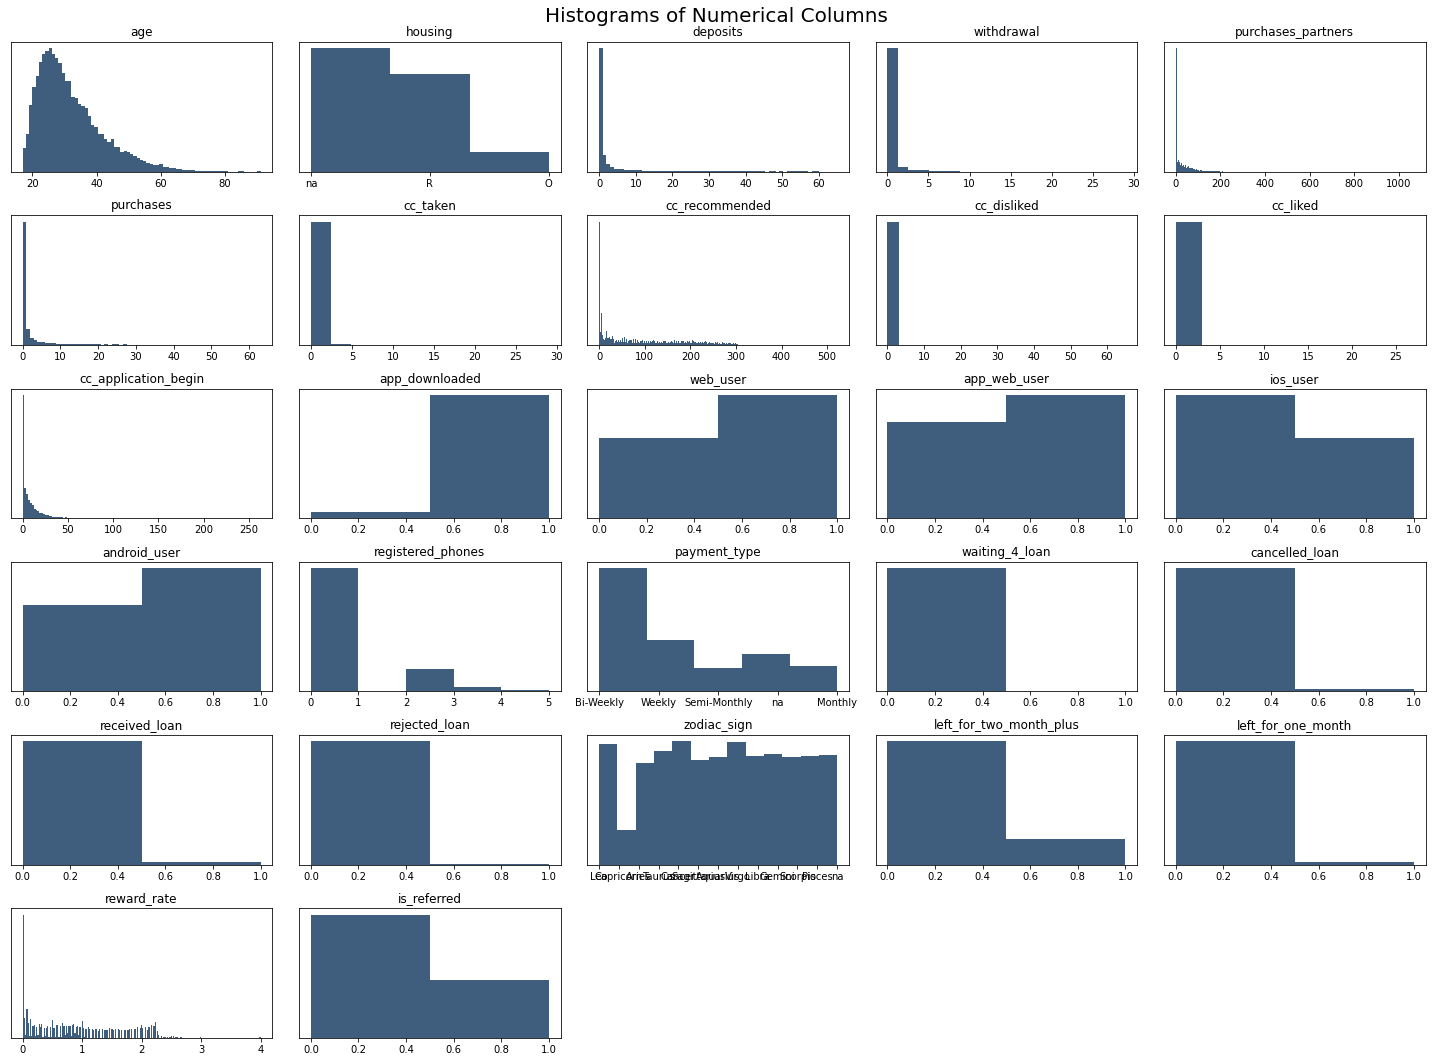

In [11]:
## Histograms
dataset2 = dataset.drop(columns = ['user', 'churn'])
fig = plt.figure(figsize=(20, 15))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()                                # clear output
    f.axes.get_yaxis().set_visible(False)        # do not show y labels to reduce clatter
    f.set_title(dataset2.columns.values[i - 1])  # go thru each column's name from 0 to len(columns)

    vals = np.size(dataset2.iloc[:, i - 1].unique())  # collect the number of unique values in each column to form the hist bins
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0, 1, 1])  # specify dimension of each subplot incl labels  tuple (left, bottom, right, top)

C:\Users\lveys\anaconda3\envs\tensorflow_py37\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 


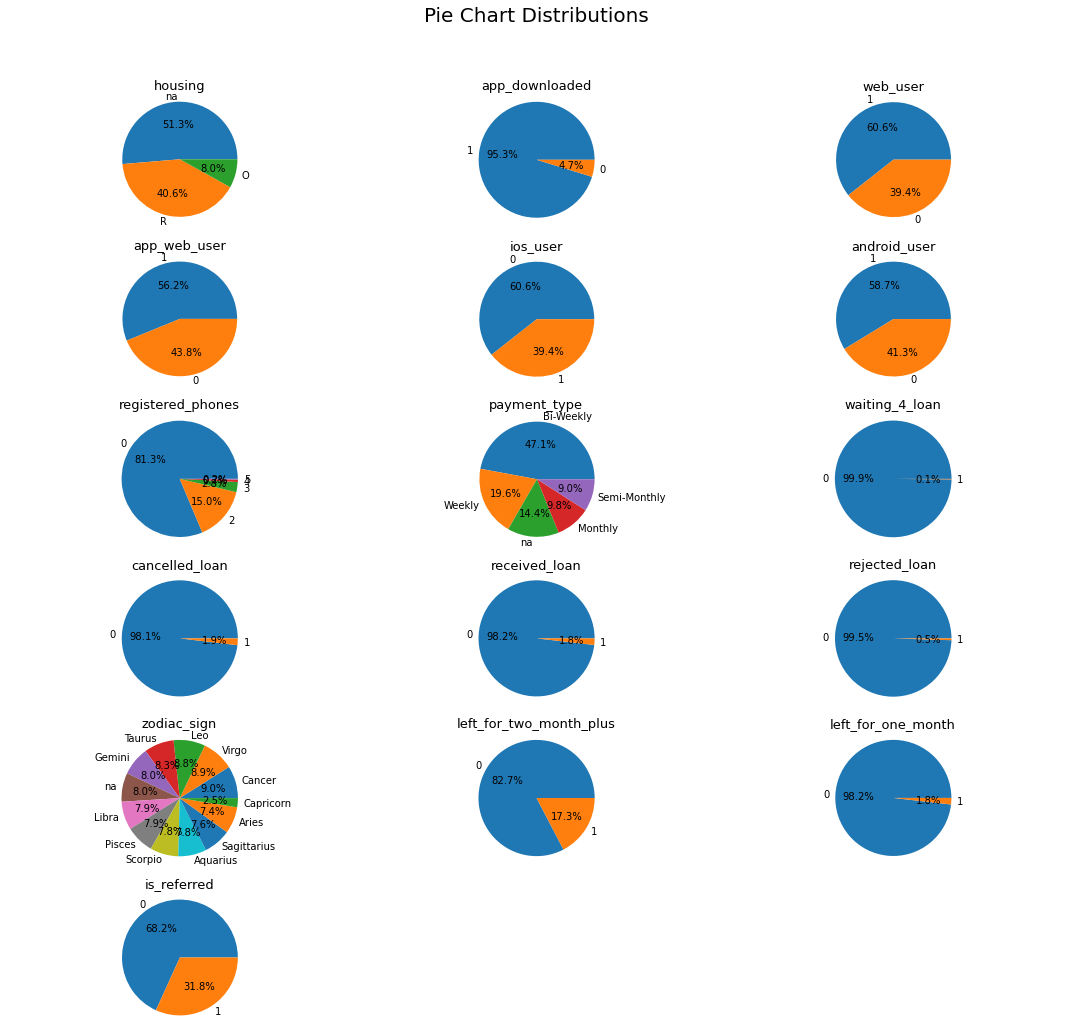

In [12]:
## Pie Plots selecting only binary variables - check prevalence
dataset3 = dataset[['housing', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
fig = plt.figure(figsize=(15, 15))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset3.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset3.columns.values[i - 1], fontsize=13)
   
    values = dataset3.iloc[:, i - 1].value_counts(normalize = True).values   # Normalize arg returns pct%
    index = dataset3.iloc[:, i - 1].value_counts(normalize = True).index     # show the binary index as the pie chart index
    plt.pie(values, labels = index, autopct='%1.1f%%')   # autopct : how to display distribution as 0.1
    plt.axis('equal')   # do not show x or y axis
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

conclusion: not enough results for a few variables. One of the value is not represented sufficiently

In [13]:
## Exploring Uneven Features - Check the distribution of churn for these very little represented values
dataset[dataset3.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [14]:
dataset[dataset3.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [15]:
dataset[dataset3.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [16]:
dataset[dataset3.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [17]:
dataset[dataset3.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

No bias observed as both value options are represented

<AxesSubplot:title={'center':'Correlation with Response variable'}>

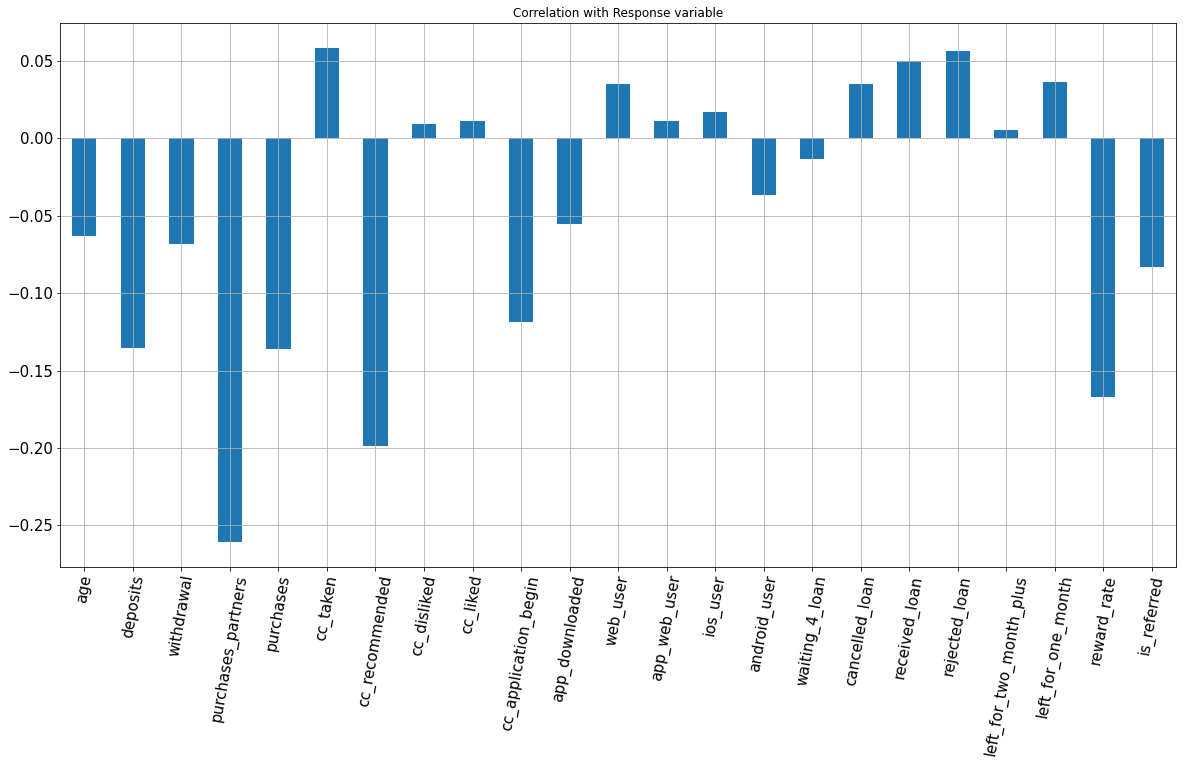

In [18]:
## Correlation with Response Variable
dataset2.drop(columns = ['housing', 'payment_type',
                         'registered_phones', 'zodiac_sign']   # drop the categorical variables first
    ).corrwith(dataset.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 80,
              grid = True)

<AxesSubplot:>

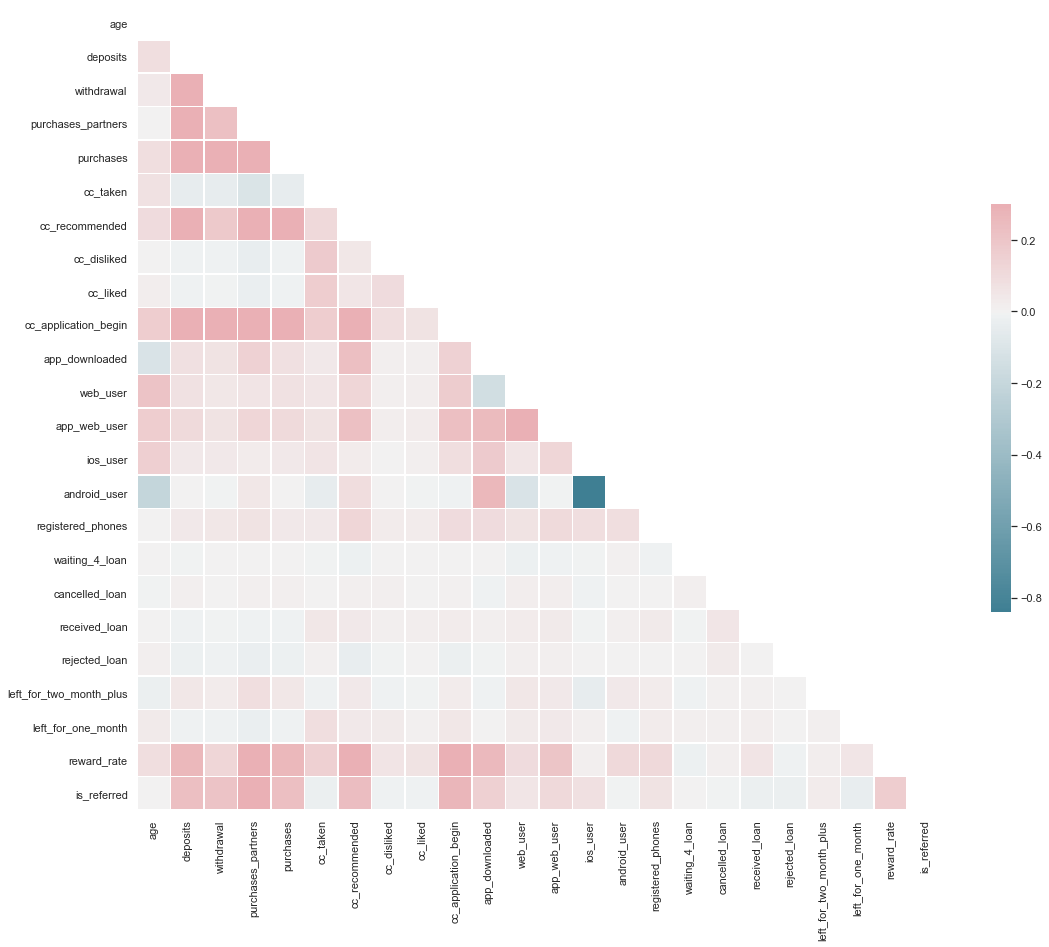

In [19]:
## Correlation Matrix
sn.set(style="white")

# Compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr()   # remove response variable and not relevant user index

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

observations:
- we should combine IOS and Android columns which are highly correlated into one single column
- positive correlations are small according to scale even Ccc_application with all var and is_referred
- app_web_user redundant with web_user and app_dwl so should be removed

In [20]:
# Removing Correlated Fields
dataset = dataset.drop(columns = ['app_web_user'])

## Note: Although there are somewhat correlated fields, they are not colinear
## These feature are not functions of each other, so they won't break the model
## But these feature won't help much either. Feature Selection should remove them.

In [21]:
dataset.to_csv('new_churn_data.csv', index = False)

# Modeling process

In [22]:
import random

dataset = pd.read_csv('new_churn_data.csv')

In [23]:
## Data Preparation
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

In [24]:
# One-Hot Encoding of categorical variables
#dataset.housing.value_counts()   # possible values of housing column
#dataset.groupby('housing')['churn'].nunique().reset_index()
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [25]:
# remove one column of each categorical variables to break correlation (if one column is 1 then all others are 0)
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

In [27]:
# Balancing the Training Set -  if the model would predict only 0 then the accuracy on train set would be above 50% (60% here)
# this ensures the accuracy is solely coming from the model not from any bias
# Test set does not need to be balanced as in real life
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [28]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))  # select randomly same number of lower set items in higher set to balance both
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))   # the new set of indexes for a balanced outcome y

X_train = X_train.loc[new_indexes,]   # subsampling X_train
y_train = y_train[new_indexes]        # subsampling y_train

#### Feature scaling

In [29]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train)) # scaler return an array with no column names and index. we will re-integrate those
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

## Build the model

In [30]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [31]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [32]:
# Evaluating Results
# precision = tp / (tp + fp) , recall = tp / (tp + fn)
print('accuracy:%0.2f'%accuracy_score(y_test, y_pred),'precision:%0.2f'%precision_score(y_test, y_pred),
      'recall:%0.2f'%recall_score(y_test, y_pred),'F1-score:%0.2f'%f1_score(y_test, y_pred))

accuracy:0.61 precision:0.52 recall:0.74 F1-score:0.61


- accuracy is not very high
- of all predicted positives, only 52% correct (precision) which is not good, meaning there are a lot of users wrongly detected as leavers
- of all users leaving, the model detect 74% of them (recall) which is a better performance considering our objective to detect leavers

Test Data Accuracy: 0.6143


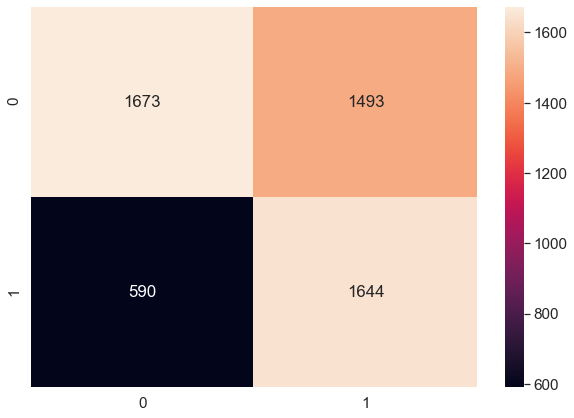

In [33]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [34]:
# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.shape)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

(10,)
SVM Accuracy: 0.643 (+/- 0.020)


In [35]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.172173
1,deposits,0.366689
2,withdrawal,0.023720
3,purchases_partners,-0.712441
4,purchases,-0.472584
5,cc_taken,0.070707
6,cc_recommended,0.060351
7,cc_disliked,-0.013892
8,cc_liked,0.007586
9,cc_application_begin,0.030024


### Feature selection
- slim down the model to the meaningful variables

In [36]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Model to Test
classifier = LogisticRegression()
X_train.shape

(17880, 41)

In [37]:
# Select Best X Features
rfe = RFE(classifier, 20)      # feature selection method with a target of 20 remaining
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)   # boolean showing includied fields or not
print(rfe.ranking_)   # returns 1 (for those included) and rank the excluded ones by decreasing importance
X_train.columns[rfe.support_]  # shows the 20 columns kept to be the best predictors

C:\Users\lveys\anaconda3\envs\tensorflow_py37\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[ True  True False  True  True  True  True False False  True False  True
  True False  True  True  True  True  True  True False  True False  True
  True False False False  True False False False  True False False False
 False False False False False]
[ 1  1  5  1  1  1  1 15 19  1 11  1  1 10  1  1  1  1  1  1  2  1  6  1
  1  8  9  7  1 20 18 16  1  3 22  4 12 21 13 14 17]


Index(['age', 'deposits', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_application_begin', 'web_user', 'ios_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'reward_rate', 'housing_O', 'housing_R', 'payment_type_Weekly',
       'zodiac_sign_Capricorn'],
      dtype='object')

<AxesSubplot:>

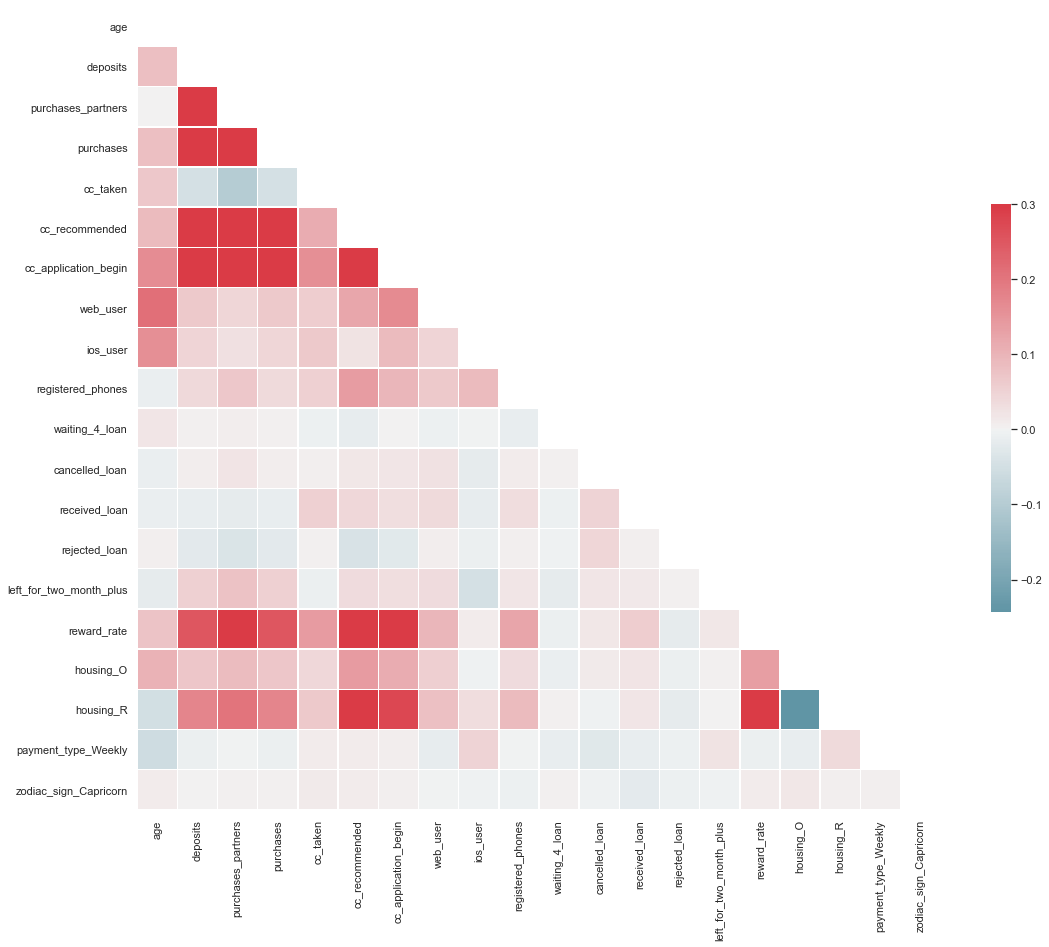

In [38]:
# New Correlation Matrix
sn.set(style="white")

# Compute the correlation matrix
corr = X_train[X_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})  

In [39]:
# Fitting Model to the Training Set
classifier = LogisticRegression()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])

In [40]:
# Evaluating Results
# precision = tp / (tp + fp) , recall = tp / (tp + fn)
print('accuracy:%0.2f'%accuracy_score(y_test, y_pred),'precision:%0.2f'%precision_score(y_test, y_pred),
      'recall:%0.2f'%recall_score(y_test, y_pred),'F1-score:%0.2f'%f1_score(y_test, y_pred))

accuracy:0.61 precision:0.52 recall:0.74 F1-score:0.61


Test Data Accuracy: 0.6098


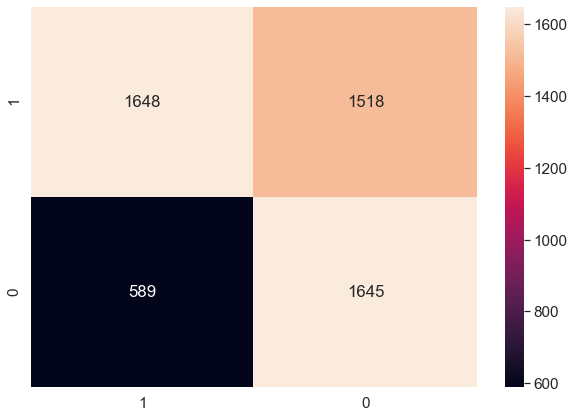

In [41]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))


### Conclusion
- these 20 columns achieve similar predictive performance as the full 41 meaning that the other ones are not relevant to the task
- these 20 columns can be the main focus to detect leavers

In [42]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.644 (+/- 0.022)


In [46]:
# Analyzing Coefficients
key_var = pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)
key_var

,features,coef
0,age,-0.170917
1,deposits,0.392750
2,purchases_partners,-0.700559
3,purchases,-0.487392
4,cc_taken,0.070506
5,cc_recommended,0.061039
6,cc_application_begin,0.038109
7,web_user,0.115697
8,ios_user,0.032062
9,registered_phones,0.100764


In [58]:
# Select top k variables
k = 5
topk_pos = key_var.nlargest(k, 'coef')
topk_neg = key_var.sort_values('coef', ascending=True)[:k]

In [57]:
print('top %d variables determining customer decision to exit: \n'%k, topk_pos)

top 5 variables determining customer decision to exit: 
              features      coef
1            deposits  0.392750
7            web_user  0.115697
9   registered_phones  0.100764
12      received_loan  0.099340
13      rejected_loan  0.092397


These drivers are contributing the most to customer cancelling their subscriptions:
- customer using the web app but not the mobile app
- customers with several phones registered
- the more deposits a customer does, the more likely he will cancel his subscription
- customers having received a loan a more likely to exit, as well as those rejecting a loan after it has been granted

All these findings should be analyzed to understand the underneath drivers. Is the process for deposit showing good UX ? Are there competitors offering better value to customers making deposits ? etc...These can be a good source for improvement in the value proposition.

In [56]:
print('top %d variables engaging customer to keep subscription: \n'%k, topk_neg)

top 5 variables engaging customer to keep subscription: 
               features      coef
2   purchases_partners -0.700559
3            purchases -0.487392
15         reward_rate -0.224748
0                  age -0.170917
10      waiting_4_loan -0.053805


These drivers favoring customer engagement make a lot of sense:
- the older you are, the less you a likely to cancel subscription
- the more you benefit and buy with prefered partners on the platform, the more you are to stay
- the higher the rewards, the more likely to stay
- a customer a more likely to maintain subscription if he has applied to a loan

In [44]:
# Formatting Final Results
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)

In [45]:
final_results

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
...,...,...,...
5395,22377,0.0,1
5396,24291,1.0,1
5397,23740,0.0,1
5398,47663,1.0,0
